# 一起来打怪之 Credit Scoring 练习

---
## 作业说明

- 答题步骤：
    - 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
    - 请养成代码注释的好习惯

- 解题思路：
    - 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
    - 解题思路**仅供参考**，鼓励原创解题方法
    - 为督促同学们自己思考，解题思路内容设置为**白色**，必要时请从冒号后拖动鼠标查看

- 所用数据
    - 请注意导入数据库后先**查看和了解数据的基本性质**，后面的问题不再一一提醒

## machine learning for credit scoring


Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years. [Dataset](https://www.kaggle.com/c/GiveMeSomeCredit)

Attribute Information:

|Variable Name	|	Description	|	Type|
|----|----|----|
|SeriousDlqin2yrs	|	Person experienced 90 days past due delinquency or worse 	|	Y/N|
|RevolvingUtilizationOfUnsecuredLines	|	Total balance on credit divided by the sum of credit limits	|	percentage|
|age	|	Age of borrower in years	|	integer|
|NumberOfTime30-59DaysPastDueNotWorse	|	Number of times borrower has been 30-59 days past due |	integer|
|DebtRatio	|	Monthly debt payments	|	percentage|
|MonthlyIncome	|	Monthly income	|	real|
|NumberOfOpenCreditLinesAndLoans	|	Number of Open loans |	integer|
|NumberOfTimes90DaysLate	|	Number of times borrower has been 90 days or more past due.	|	integer|
|NumberRealEstateLoansOrLines	|	Number of mortgage and real estate loans	|	integer|
|NumberOfTime60-89DaysPastDueNotWorse	|	Number of times borrower has been 60-89 days past due |integer|
|NumberOfDependents	|	Number of dependents in family	|	integer|


----------
## Read the data into Pandas 

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()
import warnings
warnings.filterwarnings ("ignore")

In [2]:
data.shape

(112915, 11)

------------
## Drop na

In [3]:
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [4]:
data.dropna(inplace=True)
data.shape

(108648, 11)

---------
## Create X and y

In [5]:
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

In [6]:
y.mean()

0.06742876076872101

---
## 练习1：把数据切分成训练集和测试集
- 提示：<span style='color:white'>from sklearn.model_selection import train_test_split('Gender') </span>

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

----
## 练习2：使用logistic regression/决策树/SVM/KNN...等sklearn分类算法进行分类
尝试查sklearn API了解模型参数含义，调整不同的参数

### Logistic regression
- 提示：<span style='color:white'>from sklearn import linear_model('Gender') </span>

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9319374137137598


### Decision Tree
- 提示：<span style='color:white'>from sklearn.tree import DecisionTreeClassifier('Gender') </span>

In [9]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8938794293603314


### Random Forest
- 提示：<span style='color:white'>from sklearn.ensemble import RandomForestClassifier('Gender') </span>

In [10]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9340082834790612


### SVM
- 提示：<span style='color:white'>from sklearn.svm import SVC('Gender') </span>

In [11]:
from sklearn.svm import SVC
model = SVC(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9317073170731708


### KNN
- 提示：<span style='color:white'>from sklearn.neighbors import KNeighborsClassifier('Gender') </span>

In [12]:
from sklearn.neighbors import KNeighborsClassifier
model =  KNeighborsClassifier(3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9267832489645651


---

## 练习3：在测试集上进行预测，计算准确度

### Logistic regression
- 提示：<span style='color:white'>y_pred_LR = clf_LR.predict(x_test)('Gender') </span>

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9319374137137598


### Decision Tree
- 提示：<span style='color:white'>y_pred_tree = tree.predict(x_test)('Gender') </span>

In [14]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8938794293603314


### Random Forest
- 提示：<span style='color:white'>y_pred_forest = forest.predict(x_test)('Gender') </span>

In [15]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9340082834790612


### SVM
- 提示：<span style='color:white'>y_pred_SVC = clf_svc.predict(x_test)('Gender') </span>

In [16]:
from sklearn.svm import SVC
model = SVC(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9317073170731708


### KNN
- 提示：<span style='color:white'>y_pred_KNN = neigh.predict(x_test)('Gender') </span>

In [17]:
from sklearn.neighbors import KNeighborsClassifier
model =  KNeighborsClassifier(3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9267832489645651


---
## 练习4：查看sklearn的官方说明，了解分类问题的评估标准，并对此例进行评估

**混淆矩阵（Confusion Matrix）相关学习链接**

- Blog:<br>
http://blog.csdn.net/vesper305/article/details/44927047<br>
- WiKi:<br>
http://en.wikipedia.org/wiki/Confusion_matrix<br>
- sklearn doc:<br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

Accuracy: 0.9267832489645651


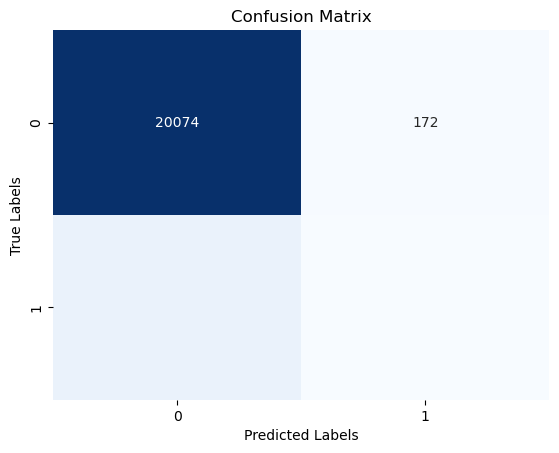

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
model =  KNeighborsClassifier(3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## 练习5：调整模型的标准

银行通常会有更严格的要求，因为fraud带来的后果通常比较严重，一般我们会调整模型的标准。<br>

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”，试试看把阈值设定为0.3，再看看这时的评估指标(主要是准确率和召回率)。

- 提示：<span style='color:white'>sklearn的很多分类模型，predict_prob可以拿到预估的概率，可以根据它和设定的阈值大小去判断最终结果(分类类别)('Gender') </span>

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Set a lower threshold for classification
threshold = 0.3
y_prob = model.predict_proba(X_test)[:, 1]  # Get the probabilities of the positive class
y_pred_lower_threshold = (y_prob >= threshold).astype(int)

# Evaluate the model's performance with the lower threshold
accuracy = accuracy_score(y_test, y_pred_lower_threshold)
precision = precision_score(y_test, y_pred_lower_threshold)
recall = recall_score(y_test, y_pred_lower_threshold)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9307
Precision: 0.4409
Recall: 0.0553
